#### Understanding of bike-sharing System: 
    
    A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### Problem Statement:

    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### Approach taken by the company:

    They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
    
#### The company wants to know:

    a. Which variables are significant in predicting the demand for shared bikes.
    b. How well those variables describe the bike demands
    
#### Goal:

    1. Create a linear model that describes the effect of various features on the price
    2. The model should be interpretable so that the management can understand it and take the decisions.

### Step 1: Importing libraries

In [266]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [267]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Step 2: Reading and understanding the data

In [268]:
# Read the data from csv file

df = pd.read_csv(r'C:\Users\a913779\Downloads\day.csv')

In [269]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [270]:
# checking no. of rows and columns present in the dataset (or rather the shape of the data)

df.shape

(730, 16)

In [271]:
#checking info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [272]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [273]:
# Check the columns of data

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [274]:
# Let's rename the columns as per data dictionary for better readability and understanding

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [275]:
# Check the head of the dataset

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [276]:
# Let us check the amount of data present in the dataset (or basically the sixe of dataset)

df.size

11680

In [277]:
# check for duplicate values in the dataframe

duplicate_values = df.duplicated()
print(duplicate_values)

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool


#### Conclusion of this step:

1. There are no null values
2. There are no duplicates
3. data columns are renamed for better understanding
4. data types looks good

### Step 3: Data Cleaning

In [278]:
#### Drop columns that are not useful for analysis

# 1. instant is just a row instance identifier.
# 2. dteday (renamed to date), can be removed, as we have other date features like month, year and weekday which can be used for analysis.
# 3. casual and registered variables describes the target variable cnt (target = casual + registered)

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [279]:
#### Map all values of categorical variables from the data dictionary

#season
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [280]:
#month (take only 3 characters of the month name for readability)
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',
                         10:'oct',11:'nov',12:'dec'})

In [281]:
#weekday (Assuming day starts from Sunday)
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [282]:
#weather
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [283]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [284]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [285]:
# Handle missing values

df.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
dtype: int64

In [286]:
# Handle Outliers

#Print number of unique values in all columns

column_unique = df.nunique()
print(column_unique)

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64


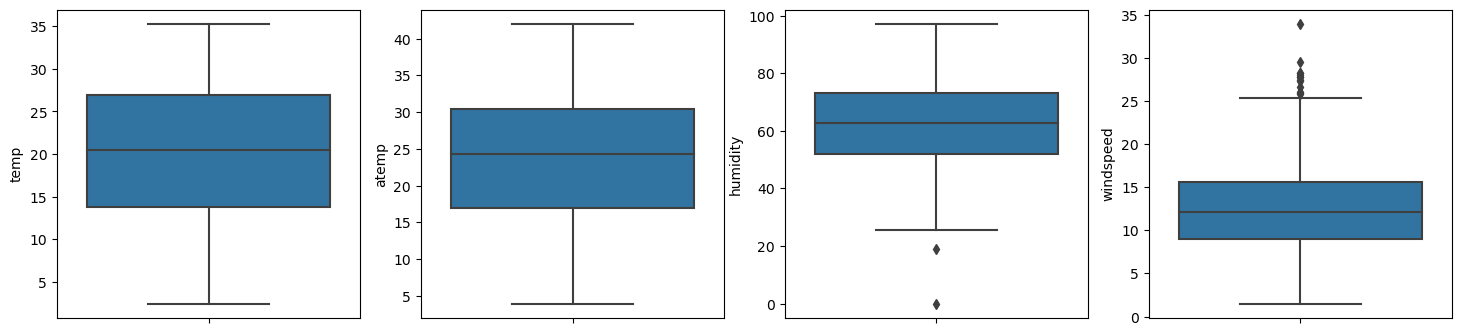

In [287]:
# Draw box plots for independent variables with continuous values

cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

#### Conclusion of this step: From the above analysis and dat cleaning activity

1. There are no null values/ missing values
2. Unneccessary columns are removed
3. Categorical columns mapped properly
4. There are no outliers

### Step 4: EDA

#### Visualizing Categorical Variables
#### Univariate Analysis and Bivariate Analysis

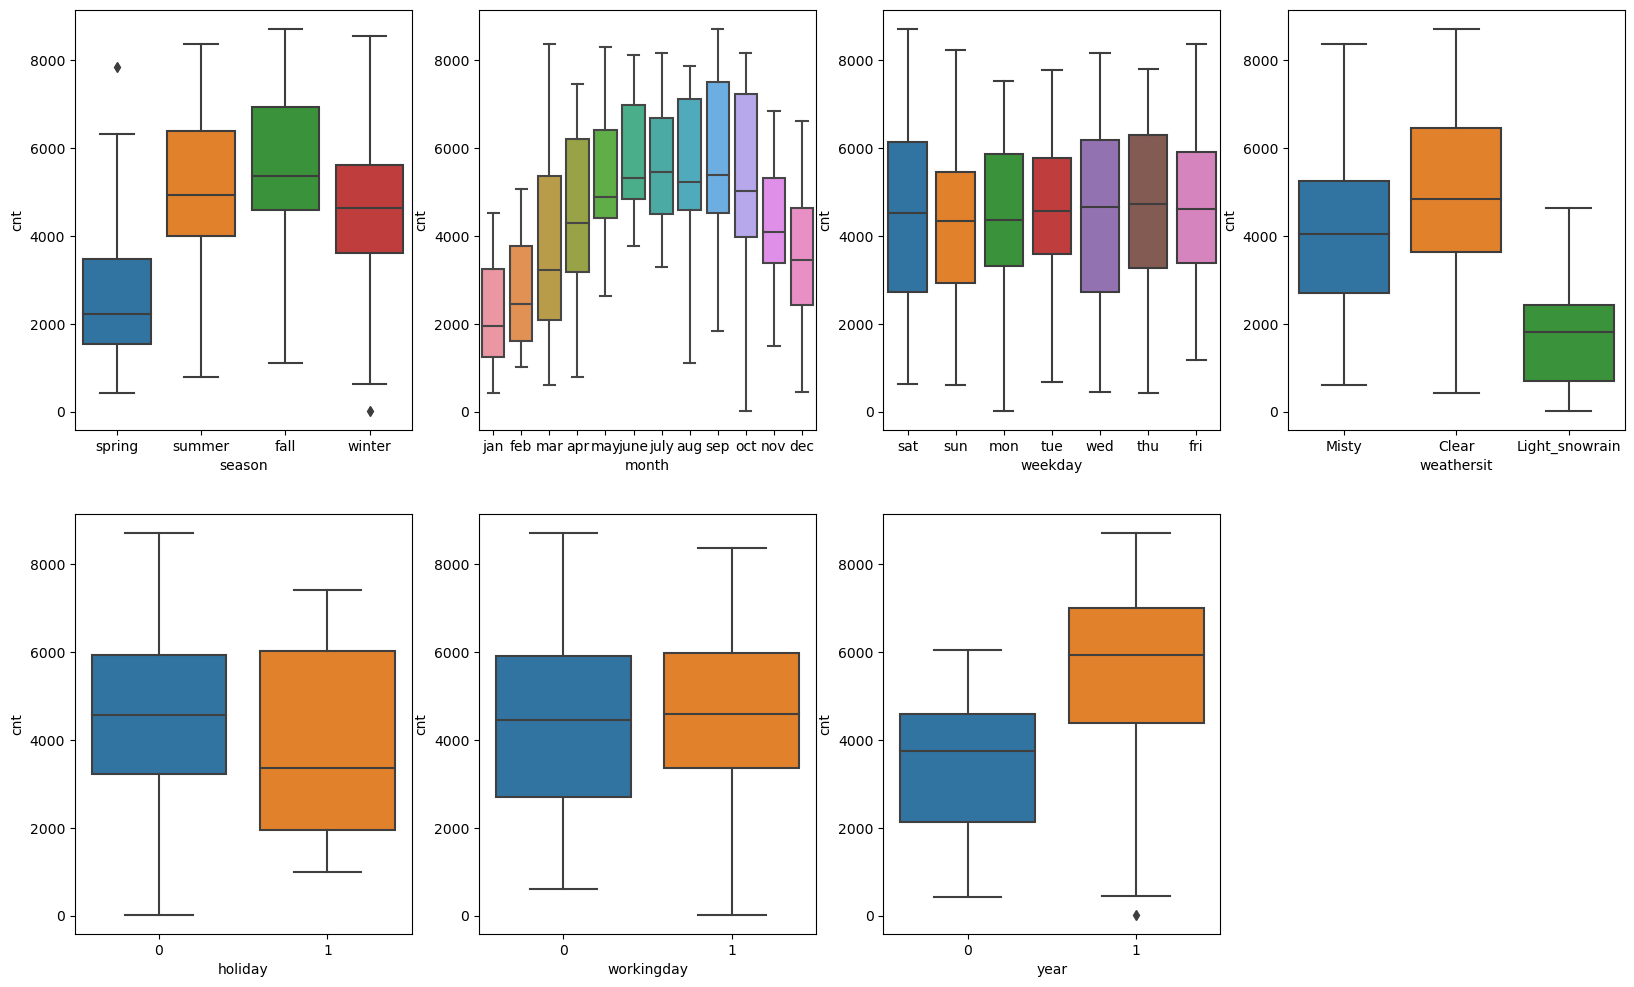

In [288]:
# visualizing the categorical columns
# to see how predictor variable (cnt) stands against the target variables (categorical variables)

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

Conclusion:

    1. Season 3: "Fall" has the highest demand for rental bikes
    2. Demand is growing each month till June. September month (which is also related to season "fall"), has the highest demand after September, demand is decreasing.
    3. Weekday do not have much differences, so it cannot be concluded.
    4. When there is a holiday, demand has decreased.
    5. Weathersit = 'Clear' has highest demand which implies, people prefer shared bikes on "Clear weather days".
    6. On "Holidays" i.e., Holiday = 0, the demand decreases.
    7. Working day shows that, usually the demand is more on workingday.
    8. The demand has increased in the year "2019" compared to "2018".
    
Overall:

During the demand for shared-bikes is more during "September" month which denotes the "fall" season, where th weather is most likely "Clear". Also, people prefer shared bikes when there is no holiday or is a working day. Also, more likely, due to weather conditions, the demand decreases after September.

### Analysing each variable independently w.r.t year

In [289]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

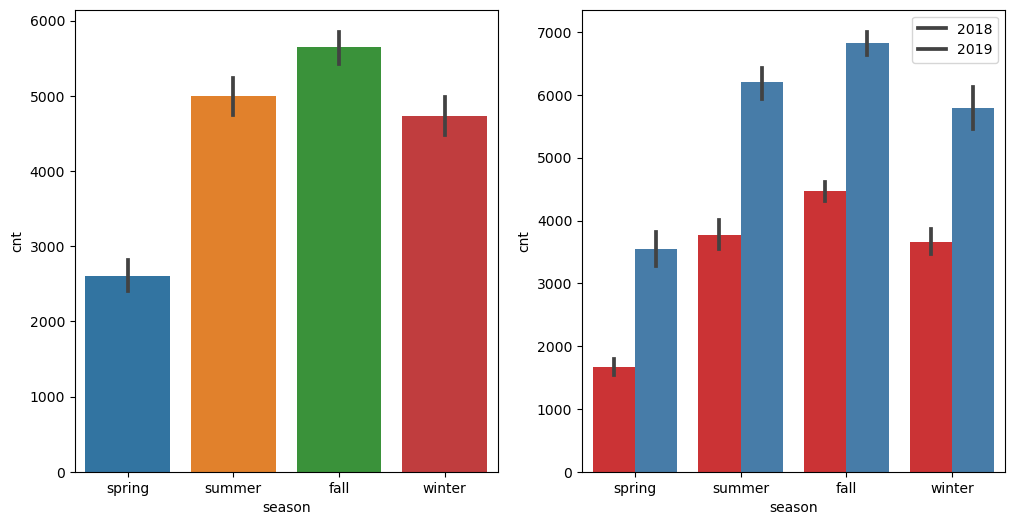

In [290]:
# plotting visualization for season column

plot_cat_columns('season')

Fall season seems to have attracted more shared bike rides. And, in each season the booking count has increased drastically from 2018 to 2019.

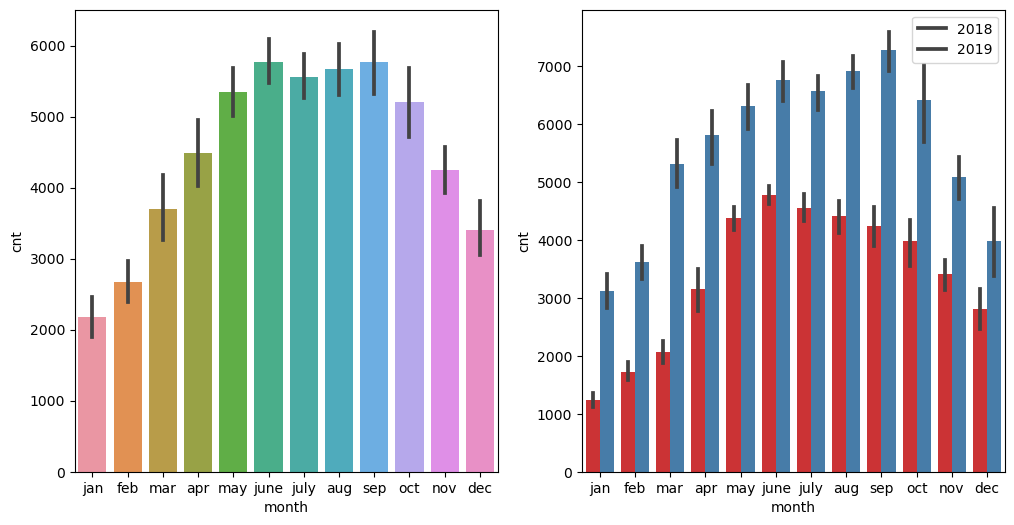

In [291]:
# plotting visualization for month column

plot_cat_columns('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

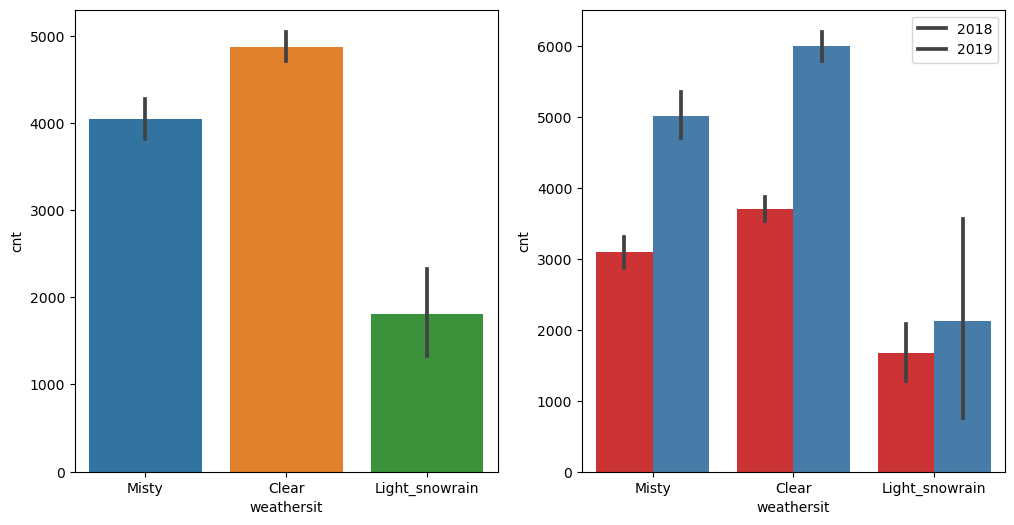

In [292]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

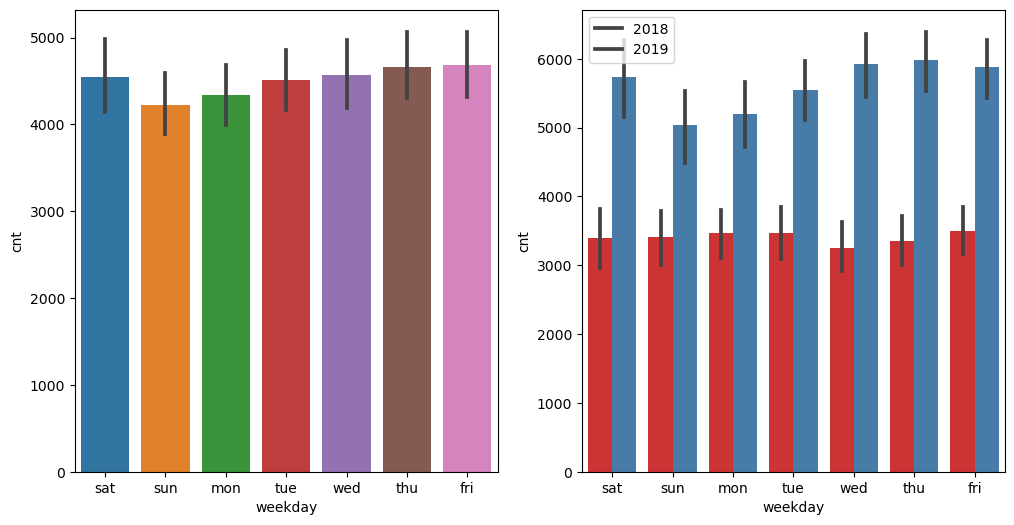

In [293]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Thu, Fri, Sat and Sun have more number of bookings as compared to the start of the week.

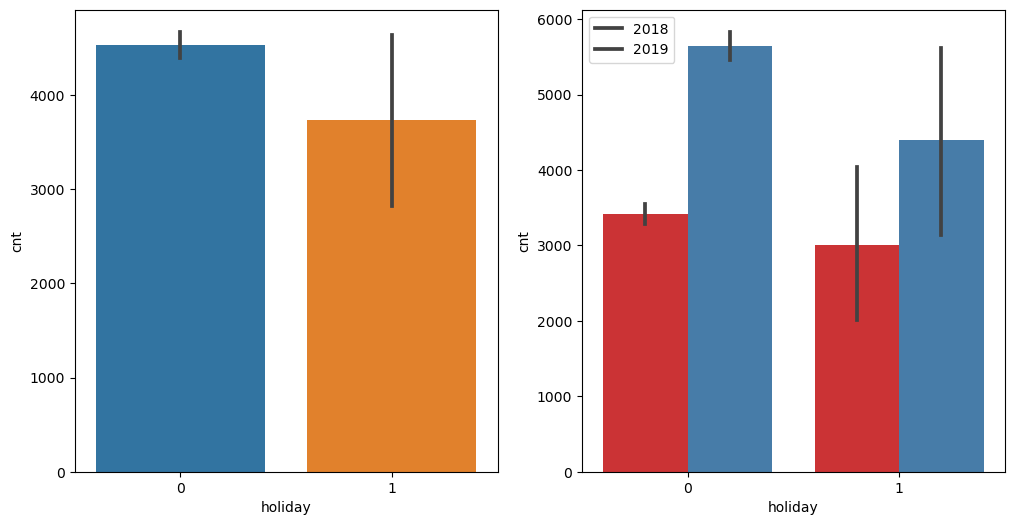

In [294]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

When its holiday, booking seems to be less in number

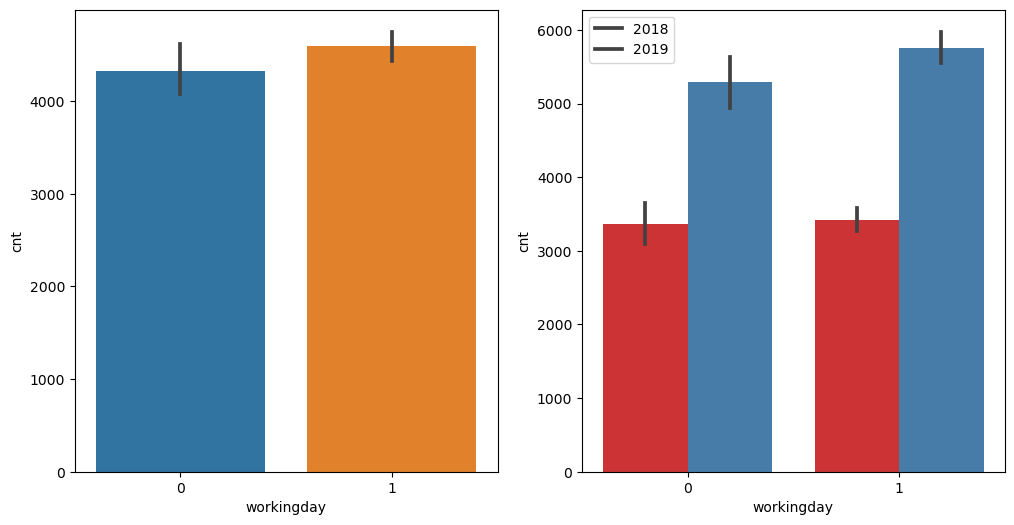

In [295]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

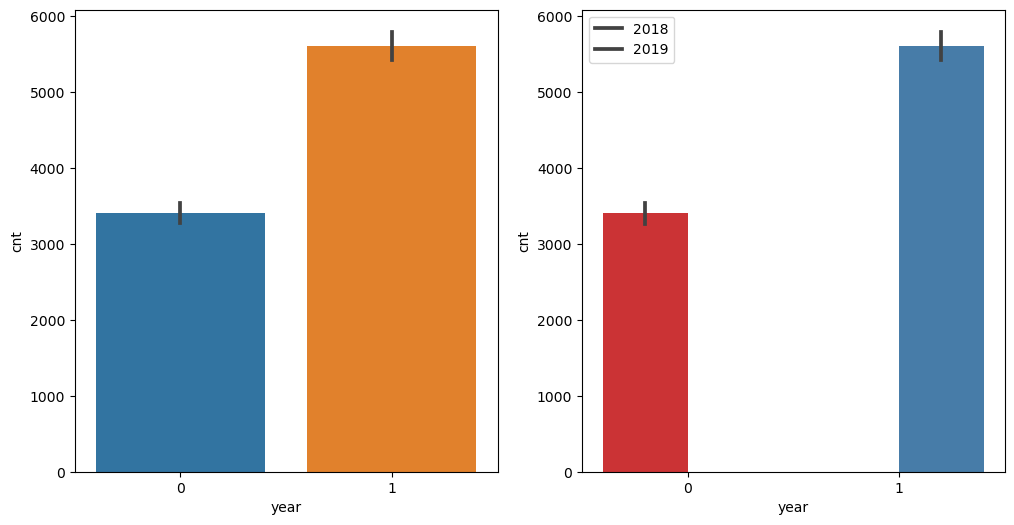

In [296]:
# plotting visualization for year column

plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

#### Visualizing numerical variables

<Figure size 1500x3000 with 0 Axes>

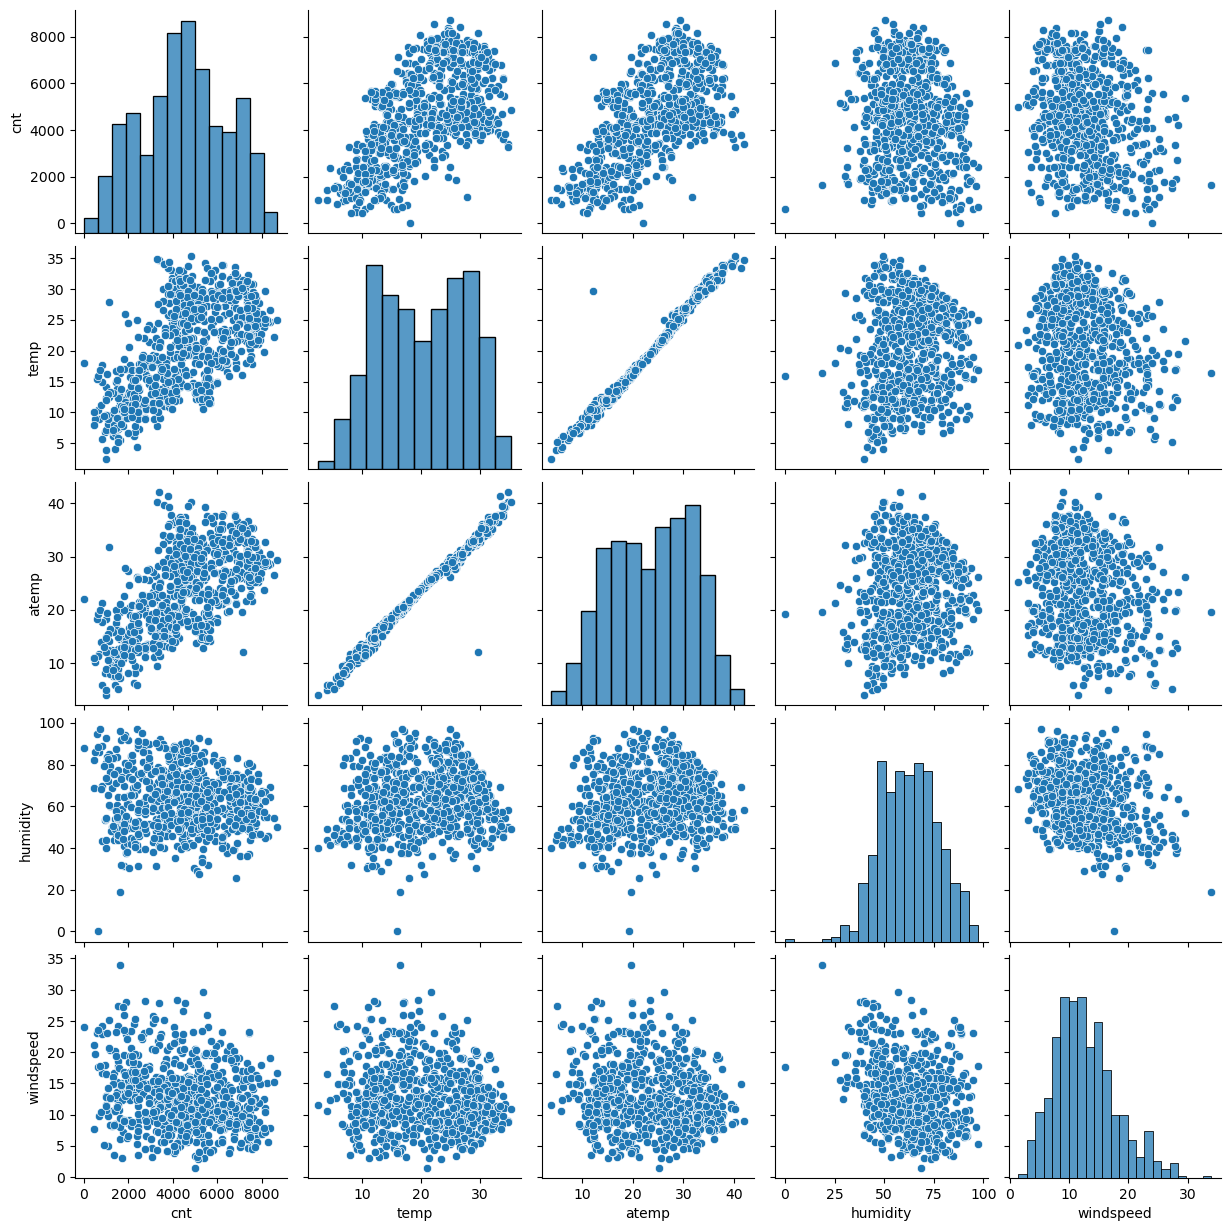

In [297]:
#Draw pairplots for continuous numeric variables using seaborn

plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

Conclusion:

The temp and atemp has the highest correlation with the target variable cnt and has linear relationship

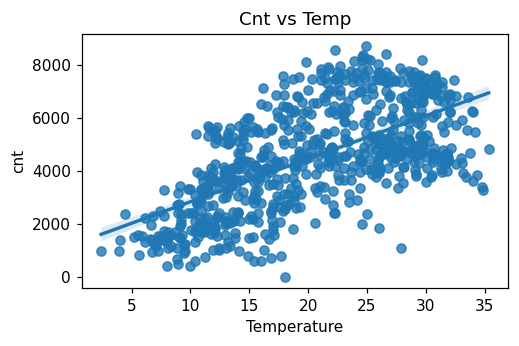

In [298]:
# Individual numerical variable analysis against cnt
#Temp

plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Temp",fontsize=12)
sns.regplot(data=df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Conclusion:

1. Demand for shared bikes is positively correlated to temp.
2. cnt is linearly increasing with temp indicating linear relation.

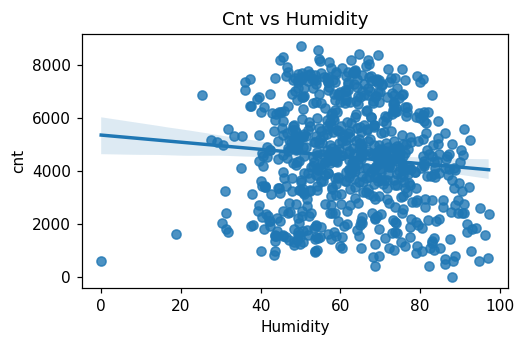

In [299]:
# Individual numerical variable analysis against cnt
#Humidity

plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Humidity",fontsize=12)
sns.regplot(data=df,y="cnt",x="humidity")
plt.xlabel("Humidity")
plt.show()

Conclusion:

1. The values for Humidity are more scattered around.
2. cnt decreases with increase in humidity.

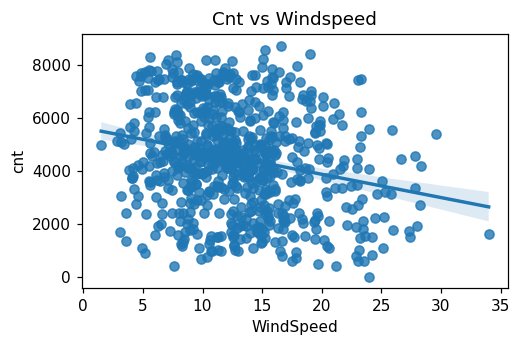

In [300]:
# Individual numerical variable analysis against cnt
#Windspeed

plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=12)
sns.regplot(data=df,y="cnt",x="windspeed")
plt.xlabel("WindSpeed")
plt.show()

Conclusion:

1. Te values for Windspeed are more scattered around.
2. cnt decreases with increase in windspeed.

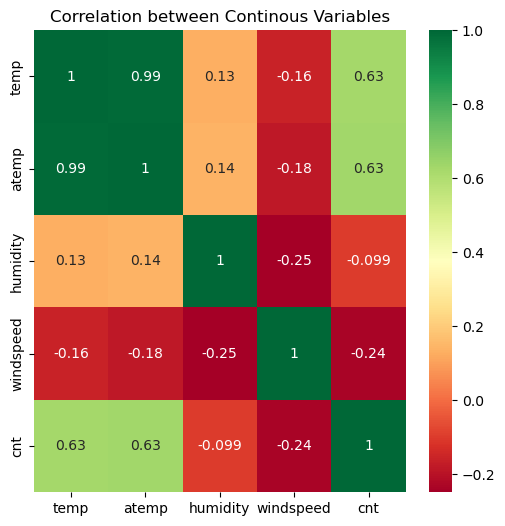

In [302]:
# Checking the correlation between the continuous variables

plt.figure(figsize = (6,6))
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Continous Variables")
plt.show()

From above, we understand that temp and atemp has correlation equivalent to 0.99 which is almost 1 (stating they are highly correlated) 
Both of the parameters cannot be used in the model due to multicollinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

### Step 5: Data Preparation

In [303]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,dtype = 'int',drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,dtype = 'int',drop_first=True)
seasons_df=pd.get_dummies(df.season,dtype = 'int',drop_first=True)

In [304]:
weathersit_df=pd.get_dummies(df.weathersit,dtype = 'int',drop_first=True)

In [305]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [306]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,seasons_df,weathersit_df],axis=1)

In [307]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,spring,summer,winter,Light_snowrain,Misty
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,0,0,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,0,0,0


In [308]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [309]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,spring,summer,winter,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,1,0,0,0,0


In [310]:
# check the shape of new dataframe

df_new.shape

(730, 30)

In [311]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int32  
 9   dec             730 non-null    int32  
 10  feb             730 non-null    int32  
 11  jan             730 non-null    int32  
 12  july            730 non-null    int32  
 13  june            730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

### Step 6: Model Building
### Splitting the Data into Training and Testing Sets

Steps in model building:
  
  1. Create train and test sets (70-30, 80-20)
  2. Train your model on training sets (Learn the coefficients)
  3. Evaluate the model (training set, test set)

In [312]:
# Checking shape before splitting
df_new.shape

(730, 30)

In [313]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [314]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [315]:
# check the shape of testing datatset

df_test.shape

(220, 30)

In [317]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,spring,summer,winter,Light_snowrain,Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,1,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,0,1


In [318]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [319]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [320]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,spring,summer,winter,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,0,1


In [321]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,spring,summer,winter,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Build a Model using RFE and Automated approach
### Use RFE to eliminate some columns

In [322]:
#X is all our independent variables
X_train = df_train

#y to contain only target variable

y_train = df_train.pop('cnt')

In [330]:
# Build a Linear Regression model using SKLearn for RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [331]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 11),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 9),
 ('mar', False, 8),
 ('may', False, 15),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 14),
 ('wed', False, 12),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [368]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'sun', 'spring', 'winter', 'Light_snowrain',
       'Misty'],
      dtype='object')


In [369]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [370]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [371]:
# Generic function to calculate VIF of variables

def calculateVIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [372]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,41.54
9,sat,10.13
10,sun,9.81
3,temp,3.19
11,spring,2.71
1,holiday,2.58
4,humidity,1.89
12,winter,1.81
14,Misty,1.57
6,jan,1.55


Workingday shows high VIF

In [373]:
X_train_rfe.shape

(510, 15)

### Building 1st linear regression model

In [374]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.51e-190
Time:                        18:38:01   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2521      0.025      9.

In [375]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,spring,summer,winter,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [376]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,23.54
2,temp,15.97
4,windspeed,4.07
10,spring,2.91
13,Misty,2.26
11,winter,2.12
0,year,2.07
5,jan,1.67
6,july,1.41
8,sat,1.23


In [377]:
X_train_new.head()

,year,holiday,temp,humidity,windspeed,jan,july,sep,sat,sun,spring,winter,Light_snowrain,Misty
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,1,1,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,0,1


In [378]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.51e-190
Time:                        18:38:15   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3489      0.031     11.

In [379]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,23.53
2,temp,15.94
4,windspeed,4.04
9,spring,2.90
12,Misty,2.26
10,winter,2.11
0,year,2.07
5,jan,1.66
6,july,1.41
11,Light_snowrain,1.22


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [366]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.55e-189
Time:                        18:37:30   Log-Likelihood:                 505.71
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     497   BIC:                            -930.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2751      0.024     11.

In [380]:
# We can drop humidity variable as it has high VIF
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.70
3,windspeed,4.01
8,spring,2.26
0,year,2.06
4,jan,1.60
11,Misty,1.54
9,winter,1.41
5,july,1.36
6,sep,1.20
7,sun,1.18


In [383]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.55e-189
Time:                        18:41:38   Log-Likelihood:                 505.71
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     497   BIC:                            -930.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2751      0.024     11.

In [384]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,year,2.06
7,spring,1.66
10,Misty,1.52
8,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
9,Light_snowrain,1.08


VIF value now seems to be good as it came below 5.

In [385]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.32e-188
Time:                        18:42:51   Log-Likelihood:                 502.54
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     498   BIC:                            -930.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2608      0.024     11.

### Conclusions
    1. We can cosider the above model i.e lr_5, as it seems to have very low multicollinearity between the predictors and the p-values for all the predictors seems to be significant.
    2. F-Statistics value of 233.6 and the Prob (F-statistic) is 1.32e-188 i.e almost equals to zero, states that the overall model is significant

In [386]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.260846
year              0.234162
holiday          -0.105667
temp              0.448572
windspeed        -0.139259
july             -0.070613
sep               0.056053
sun              -0.047735
spring           -0.111663
winter            0.047099
Light_snowrain   -0.290717
Misty            -0.081644
dtype: float64

### Step 7: Residual Analysis of the train data and validation

In [387]:
X_train_lm_5

,const,year,holiday,temp,windspeed,july,sep,sun,spring,winter,Light_snowrain,Misty
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,1,1,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,0,0,0,1


In [388]:
y_train_pred = lr_5.predict(X_train_lm_5)

### Normality of error terms

Text(0.5, 0, 'Errors')

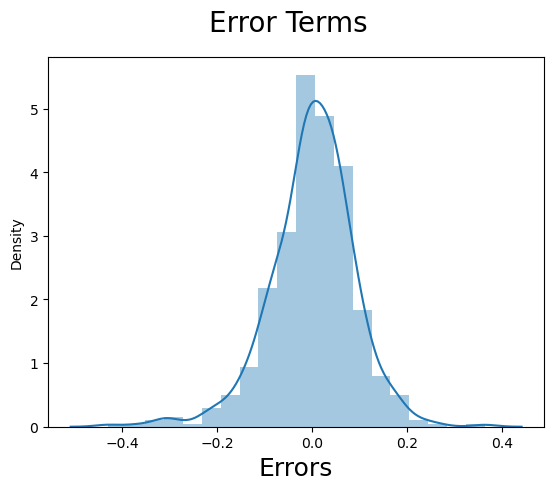

In [389]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Error terms are following normal distribution

In [393]:
#Here,If we see the error terms are independent of each other.

#Print R-squared Value

r2_score(y_train,y_train_pred)

0.8376846976240613

In [415]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print(adjusted_r2)

0.799


### MultiCollinearity

In [390]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,year,2.06
7,spring,1.66
10,Misty,1.52
8,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
9,Light_snowrain,1.08


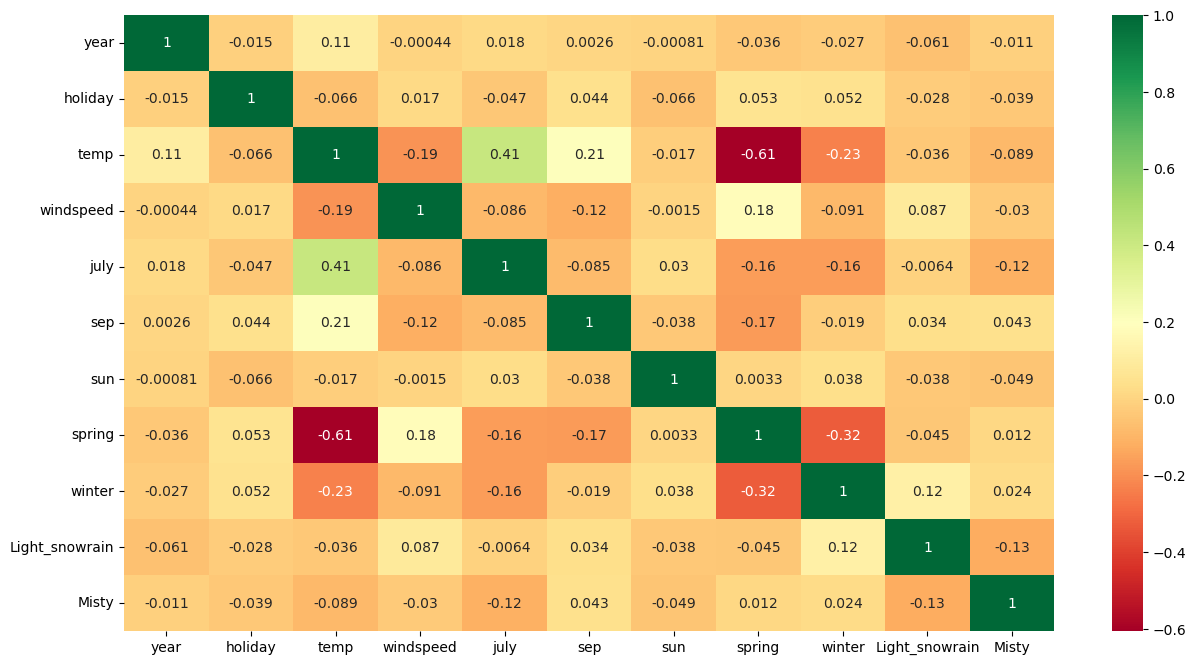

In [391]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are all less than 5 which is good and also there is no multicollinearity as seen from the heatmap.

### Linearity

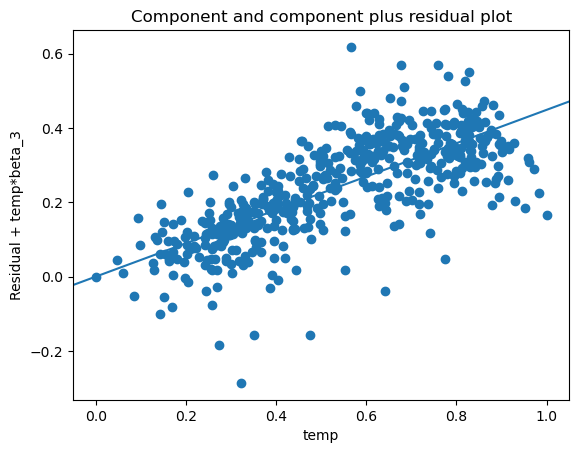

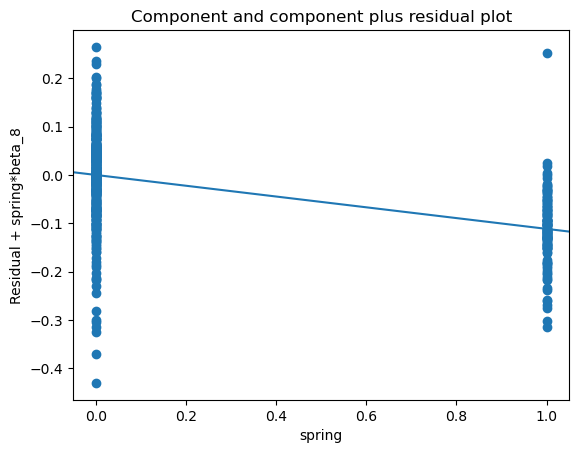

In [398]:
# scatter plot for the check
sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'spring')
plt.show()

Linearity can be observed from above visualizations.

### Homoscedasticity

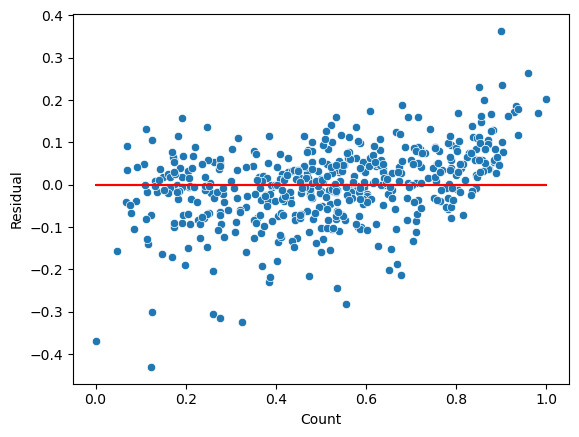

In [404]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(x = y_train, y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

### Step 8: Making Predictions

In [405]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,spring,summer,winter,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,1,0,0,0


In [406]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,spring,summer,winter,Light_snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.254545,0.263636,0.236364,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.436599,0.441609,0.425817,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [407]:
y_test = df_test.pop('cnt')
X_test = df_test

In [408]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [409]:
y_pred = lr_5.predict(X_test_lm_5)

In [410]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8104

### Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

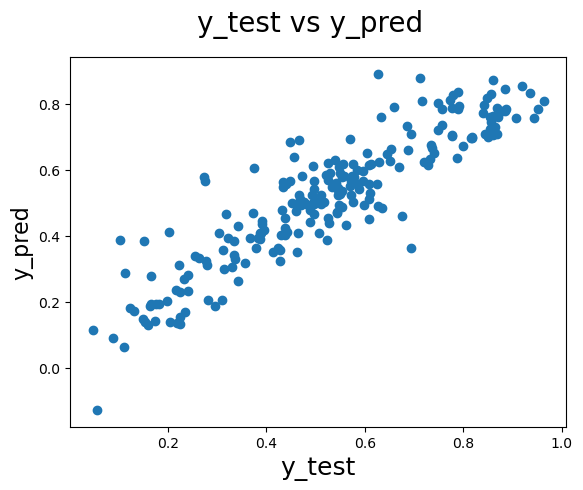

In [411]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [412]:
round(lr_5.params,4)

const             0.2608
year              0.2342
holiday          -0.1057
temp              0.4486
windspeed        -0.1393
july             -0.0706
sep               0.0561
sun              -0.0477
spring           -0.1117
winter            0.0471
Light_snowrain   -0.2907
Misty            -0.0816
dtype: float64

In [413]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8004


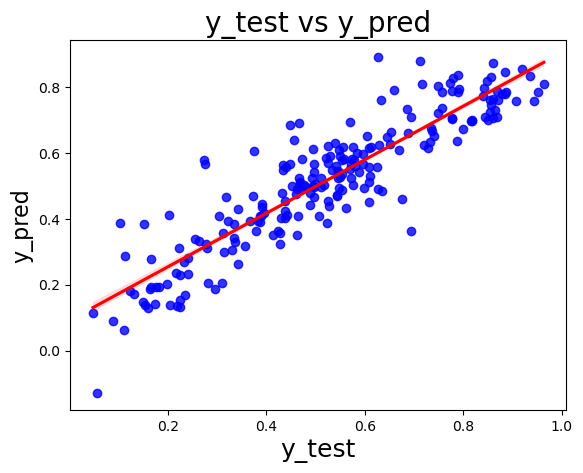

In [414]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.837
- Test dataset R^2           : 0.810
- Train dataset Adjusted R^2 : 0.799    
- Test dataset Adjusted R^2  : 0.800

## Interpretation of results:

Analysing the above model, the comapany should focus on the following features:

    1. Company should focus on expanding business during fall.
    2. Company should focus on expanding business during September.
    3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, as there is an increase in numbers from 2018 compared to 2019.
    4. Overall, the company should focus on improving business model based on season and month, for example, clear season and starting of the year, when there are no holidays.
  
Significant variables to predict the demand for shared bikes

holiday
temp
windspeed
Season
months(January, July, September, November, December)
Year (2019)